In [5]:
import brif
import pandas as pd
import time

In [16]:
# Load the data
df = pd.read_csv("data/auto.csv")
# Split into training and test
df_train = df.sample(frac = 0.7)
df_test = df.drop(df_train.index)

In [17]:
print(df_train)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
76   22.0          4         121.0          76    2511          18.0    72   
112  21.0          6         155.0         107    2472          14.0    73   
327  44.6          4          91.0          67    1850          13.8    80   
20   25.0          4         110.0          87    2672          17.5    70   
248  19.4          8         318.0         140    3735          13.2    78   
..    ...        ...           ...         ...     ...           ...   ...   
86   13.0          8         350.0         145    3988          13.0    73   
388  44.0          4          97.0          52    2130          24.6    82   
373  36.0          4          98.0          70    2125          17.3    82   
241  21.5          3          80.0         110    2720          13.5    77   
121  24.0          4         121.0         110    2660          14.0    73   

    origin  
76     EUJ  
112    USA  
327    EUJ  
20     EUJ 

In [22]:
all_vars = list(df_train.columns.values)
print(all_vars)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']


In [14]:
target_var = 'origin'

In [19]:
start = time.time()
bf = brif.brif()
bf.fit(df_train, target_var)
end = time.time()
print("Time elapsed: {:.3f}".format(end - start))

Time elapased: 0.045


In [24]:
print(df_test[all_vars])

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
7    14.0          8         440.0         215    4312           8.5    70   
8    14.0          8         455.0         225    4425          10.0    70   
13   14.0          8         455.0         225    3086          10.0    70   
..    ...        ...           ...         ...     ...           ...   ...   
377  38.0          4          91.0          67    1965          15.0    82   
380  25.0          6         181.0         110    2945          16.4    82   
382  26.0          4         156.0          92    2585          14.5    82   
383  22.0          6         232.0         112    2835          14.7    82   
390  28.0          4         120.0          79    2625          18.6    82   

    origin  
3      USA  
4      USA  
7      USA  
8      USA 

In [25]:
all_vars.remove(target_var)
start = time.time()
pred = bf.predict(df_test[all_vars], type = 'score')
end = time.time()
print("Time elapsed: {:.3f}".format(end - start))

Time elapsed: 0.006


In [27]:
print(pred)

          EUJ       USA
0    0.003761  0.996239
1    0.005275  0.994725
2    0.000923  0.999077
3    0.000923  0.999077
4    0.056023  0.943977
..        ...       ...
113  0.915707  0.084293
114  0.261772  0.738228
115  0.217507  0.782493
116  0.127679  0.872321
117  0.408414  0.591586

[118 rows x 2 columns]


In [30]:
import numpy as np
from sklearn import metrics
label = np.array(df_test[target_var])
score = np.array(pred['USA'])
fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label='USA')
auc = metrics.auc(fpr, tpr)  # Get AUC
auc

0.9562790697674418

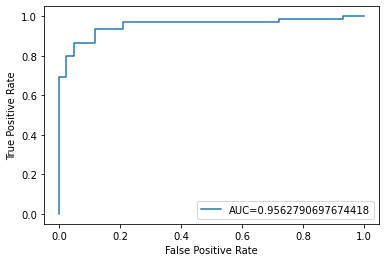

In [31]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
pred_label = bf.predict(df_test[all_vars], type = 'class')
true_label = list(df_test[target_var])
accuracy_score(pred_label, true_label)  # Get Accuracy

0.8813559322033898